# 목차
- [Pandas로 데이터 읽어오기](#Pandas로-데이터-읽어오기)
- [Pandas 기초 (1)](#Pandas_기초_(1))
- [Pandas 이용한 CCTV와 인구 현황 파악](#Pandas_이용한_CCTV와_인구_현황_파악)
- [Pandas 기초 (2)](#Pandas_기초_(2))
- [CCTV 데이터와 인구 데이터 병합하고 분석하기](#CCTV_데이터와_인구_데이터_병합하고_분석하기)
- [Matplotlib 기초](#Matplotlib_기초)
- [CCTV와 인구현황 그래프로 분석하기](#CCTV와_인구현황_그래프로_분석하기)
- [조금 더 설득력 있는 자료 만들기](#조금_더_설득력_있는_자료_만들기)

In [1]:
import numpy as np
import pandas as pd

# 데이터 정리하기

In [2]:
crime_anal_police = pd.read_csv("../data/02. crime_in_Seoul.csv", encoding="euc-kr")
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [3]:
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [4]:
data = pd.read_csv('../data/crime_in_Seoul_2021.csv',encoding='euc-kr').replace('강간,추행', '강간')
data['발생검거'] = data["죄종"] + " " + data["발생검거"]
data['구분'] = data["구분"] + "서"
data.rename(columns={"구분": "관서명"}, inplace=True)
data.drop(["죄종"], axis=1, inplace=True)
crime_anal_police = data.pivot(index="관서명", columns="발생검거", values="건수").reset_index()
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   강간 검거   31 non-null     int64 
 2   강간 발생   31 non-null     int64 
 3   강도 검거   31 non-null     int64 
 4   강도 발생   31 non-null     int64 
 5   살인 검거   31 non-null     int64 
 6   살인 발생   31 non-null     int64 
 7   절도 검거   31 non-null     int64 
 8   절도 발생   31 non-null     int64 
 9   폭력 검거   31 non-null     int64 
 10  폭력 발생   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [5]:
crime_anal_police

발생검거,관서명,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
0,강남서,433,513,10,12,3,5,1016,1941,1911,2283
1,강동서,167,188,14,15,3,3,781,1640,1697,1942
2,강북서,132,159,4,5,8,9,490,780,1625,1817
3,강서서,222,265,5,6,9,10,1070,1689,2087,2445
4,관악서,351,403,3,3,12,12,1137,2229,2355,2614
5,광진서,224,255,4,4,2,2,874,1664,1407,1676
6,구로서,142,197,5,5,6,6,1008,1763,1823,2204
7,금천서,93,117,6,7,4,4,553,999,1310,1471
8,남대문서,52,73,2,2,1,1,368,699,494,579
9,노원서,148,169,3,3,3,4,646,1404,1781,2163


#### 빈 데이터가 없는지 등을 확인

In [6]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   강간 검거   31 non-null     int64 
 2   강간 발생   31 non-null     int64 
 3   강도 검거   31 non-null     int64 
 4   강도 발생   31 non-null     int64 
 5   살인 검거   31 non-null     int64 
 6   살인 발생   31 non-null     int64 
 7   절도 검거   31 non-null     int64 
 8   절도 발생   31 non-null     int64 
 9   폭력 검거   31 non-null     int64 
 10  폭력 발생   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [7]:
len(crime_anal_police['관서명'].unique())

31

# Google Maps를 활용하여 경찰서에 관련된 정보를 가져오기

In [8]:
import googlemaps
import os
%load_ext dotenv
%dotenv
gmap_key = os.environ.get("GOOGLE_MAP_KEY")
gmaps = googlemaps.Client(key=gmap_key)

In [9]:
gmaps.geocode('여수돌산식당', language='ko')

[{'address_components': [{'long_name': '８３１',
    'short_name': '８３１',
    'types': ['premise']},
   {'long_name': '중앙동',
    'short_name': '중앙동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '여수시',
    'short_name': '여수시',
    'types': ['locality', 'political']},
   {'long_name': '전라남도',
    'short_name': '전라남도',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '550-060',
    'short_name': '550-060',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 전라남도 여수시 중앙동 831',
  'geometry': {'location': {'lat': 34.7395314, 'lng': 127.7347758},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 34.74088038029149,
     'lng': 127.7361247802915},
    'southwest': {'lat': 34.73818241970849, 'lng': 127.7334268197085}}},
  'place_id': 'ChIJyQ2l-NnYbTURc97KmBCbMgM',
  'types': ['establishment', 'food', 'point_of_interes

# 범죄 데이터에 주소, 위도, 경도 정보 추가하기

In [10]:
station_name = [f"서울{str(name[:-1])}경찰서" for name in crime_anal_police['관서명']]
crime_anal_police["관서명"] = station_name
crime_anal_police.head()

발생검거,관서명,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
0,서울강남경찰서,433,513,10,12,3,5,1016,1941,1911,2283
1,서울강동경찰서,167,188,14,15,3,3,781,1640,1697,1942
2,서울강북경찰서,132,159,4,5,8,9,490,780,1625,1817
3,서울강서경찰서,222,265,5,6,9,10,1070,1689,2087,2445
4,서울관악경찰서,351,403,3,3,12,12,1137,2229,2355,2614


In [11]:
def get_cord(name):
    print(gmaps.geocode(name, language='ko')[0].get('formatted_address').split()[2])
    print(list(filter(lambda x: 'sublocality_level_1' in x.get("types"), gmaps.geocode(name, language='ko')[0].get('address_components')))[0].get('long_name'))

get_cord("서울중부경찰서")

중구
중구


In [12]:
crime_anal_police["구별"] = crime_anal_police["관서명"].apply(lambda name: list(filter(lambda x: 'sublocality_level_1' in x.get("types"), gmaps.geocode(name, language='ko')[0].get('address_components')))[0].get('long_name'))
crime_anal_police

발생검거,관서명,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,구별
0,서울강남경찰서,433,513,10,12,3,5,1016,1941,1911,2283,강남구
1,서울강동경찰서,167,188,14,15,3,3,781,1640,1697,1942,강동구
2,서울강북경찰서,132,159,4,5,8,9,490,780,1625,1817,강북구
3,서울강서경찰서,222,265,5,6,9,10,1070,1689,2087,2445,강서구
4,서울관악경찰서,351,403,3,3,12,12,1137,2229,2355,2614,관악구
5,서울광진경찰서,224,255,4,4,2,2,874,1664,1407,1676,광진구
6,서울구로경찰서,142,197,5,5,6,6,1008,1763,1823,2204,구로구
7,서울금천경찰서,93,117,6,7,4,4,553,999,1310,1471,금천구
8,서울남대문경찰서,52,73,2,2,1,1,368,699,494,579,중구
9,서울노원경찰서,148,169,3,3,3,4,646,1404,1781,2163,노원구


In [13]:
crime_anal_police["위도"] = crime_anal_police["관서명"].apply(lambda name: gmaps.geocode(name, language='ko')[0].get('geometry')['location']['lat']) # lat
crime_anal_police

발생검거,관서명,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,구별,위도
0,서울강남경찰서,433,513,10,12,3,5,1016,1941,1911,2283,강남구,37.509435
1,서울강동경찰서,167,188,14,15,3,3,781,1640,1697,1942,강동구,37.528511
2,서울강북경찰서,132,159,4,5,8,9,490,780,1625,1817,강북구,37.637304
3,서울강서경찰서,222,265,5,6,9,10,1070,1689,2087,2445,강서구,37.551246
4,서울관악경찰서,351,403,3,3,12,12,1137,2229,2355,2614,관악구,37.474395
5,서울광진경찰서,224,255,4,4,2,2,874,1664,1407,1676,광진구,37.542873
6,서울구로경찰서,142,197,5,5,6,6,1008,1763,1823,2204,구로구,37.494931
7,서울금천경찰서,93,117,6,7,4,4,553,999,1310,1471,금천구,37.456872
8,서울남대문경찰서,52,73,2,2,1,1,368,699,494,579,중구,37.554758
9,서울노원경찰서,148,169,3,3,3,4,646,1404,1781,2163,노원구,37.642524


In [14]:
crime_anal_police["경도"] = crime_anal_police["관서명"].apply(lambda name: gmaps.geocode(name, language='ko')[0].get('geometry')['location']['lng']) # lng
crime_anal_police

발생검거,관서명,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,구별,위도,경도
0,서울강남경찰서,433,513,10,12,3,5,1016,1941,1911,2283,강남구,37.509435,127.066958
1,서울강동경찰서,167,188,14,15,3,3,781,1640,1697,1942,강동구,37.528511,127.126822
2,서울강북경찰서,132,159,4,5,8,9,490,780,1625,1817,강북구,37.637304,127.027340
3,서울강서경찰서,222,265,5,6,9,10,1070,1689,2087,2445,강서구,37.551246,126.849963
4,서울관악경찰서,351,403,3,3,12,12,1137,2229,2355,2614,관악구,37.474395,126.951349
5,서울광진경찰서,224,255,4,4,2,2,874,1664,1407,1676,광진구,37.542873,127.083821
6,서울구로경찰서,142,197,5,5,6,6,1008,1763,1823,2204,구로구,37.494931,126.886731
7,서울금천경찰서,93,117,6,7,4,4,553,999,1310,1471,금천구,37.456872,126.897043
8,서울남대문경찰서,52,73,2,2,1,1,368,699,494,579,중구,37.554758,126.973498
9,서울노원경찰서,148,169,3,3,3,4,646,1404,1781,2163,노원구,37.642524,127.071708


In [ ]:
# crime_anal_police.info()

In [ ]:
# crime_anal_police["절도 검거"] = crime_anal_police["절도 검거"].apply(lambda x: x.replace(',','')).astype(int)
# crime_anal_police["절도 발생"] = crime_anal_police["절도 발생"].apply(lambda x: x.replace(',','')).astype(int)
# crime_anal_police["폭력 발생"] = crime_anal_police["폭력 발생"].apply(lambda x: x.replace(',','')).astype(int)
# crime_anal_police["폭력 검거"] = crime_anal_police["폭력 검거"].apply(lambda x: x.replace(',','')).astype(int)
# crime_anal_police.info()

#### 정리한 데이터 저장

In [15]:
crime_anal_police.to_csv('../data/02. crime_in_Seoul_2021_include_gu_name.csv', sep=',', encoding='utf-8')

# pivot_table을 활용해서 데이터 정리하기

In [16]:
crime_anal_raw = pd.read_csv('../data/02. crime_in_Seoul_2021_include_gu_name.csv', encoding='utf-8')
crime_anal_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31 non-null     int64  
 1   관서명         31 non-null     object 
 2   강간 검거       31 non-null     int64  
 3   강간 발생       31 non-null     int64  
 4   강도 검거       31 non-null     int64  
 5   강도 발생       31 non-null     int64  
 6   살인 검거       31 non-null     int64  
 7   살인 발생       31 non-null     int64  
 8   절도 검거       31 non-null     int64  
 9   절도 발생       31 non-null     int64  
 10  폭력 검거       31 non-null     int64  
 11  폭력 발생       31 non-null     int64  
 12  구별          31 non-null     object 
 13  위도          31 non-null     float64
 14  경도          31 non-null     float64
dtypes: float64(2), int64(11), object(2)
memory usage: 3.8+ KB


In [17]:
crime_anal_raw = pd.read_csv('../data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8', index_col="구별", usecols=["구별", "관서명", "강간 검거", "강간 발생", "강도 검거", "강도 발생", "살인 검거", "살인 발생", "절도 발생", "절도 검거", "폭력 발생", "폭력 검거"])
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,,
중구,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170
종로구,서울종로경찰서,3,3,6,5,115,98,1070,413,1278,1070
중구,서울남대문경찰서,1,0,6,4,65,46,1153,382,869,794
서대문구,서울서대문경찰서,2,2,5,4,154,124,1812,738,2056,1711
종로구,서울혜화경찰서,3,2,5,4,96,63,1114,424,1015,861


In [18]:
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [19]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [20]:
# 100이 넘는 데이터가 존해(100%를 넘는 건 이상하므로 100으로 처리, 전년도 이월 사건이 있는 것으로 추정)
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


#### 서울시 구별 범죄 발생 건수와 검거율 데이터 정리

In [21]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


# 데이터 표현을 위한 다듬기

In [22]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
# 최솟값, 최댓값을 이용하여 정규화
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [23]:
result_CCTV = pd.read_csv('../data/01. CCTV_result.csv', encoding='UTF-8', index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [24]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [25]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


# 범죄 데이터 시각화하기

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid")
rc('font', family='AppleGothic')

%matplotlib inline

/Users/jeonghyeonkoh/miniforge3/envs/data_study/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeonghyeonkoh/miniforge3/envs/data_study/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


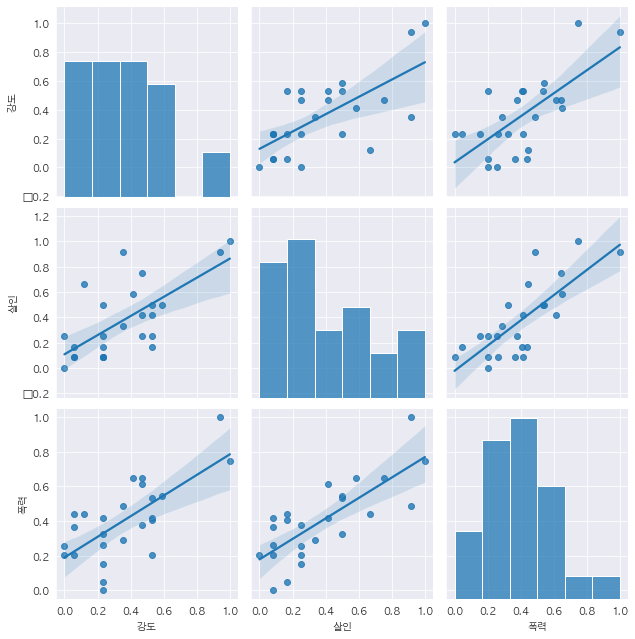

In [27]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='reg', height=3)
plt.show()

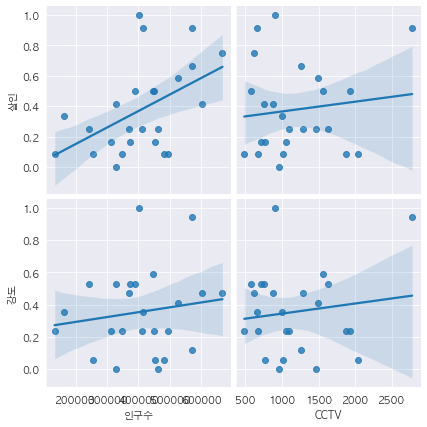

In [28]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], y_vars=["살인", "강도"], kind='reg', height=3)
plt.show()

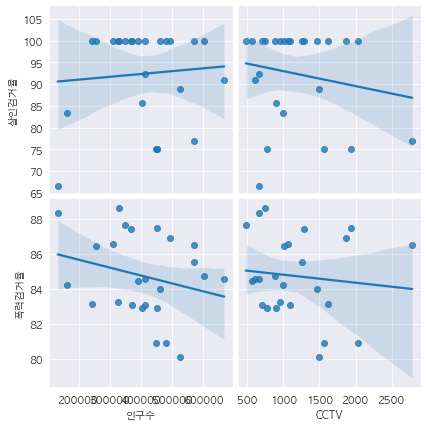

In [29]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], y_vars=["살인검거율", "폭력검거율"], kind='reg', height=3)
plt.show()

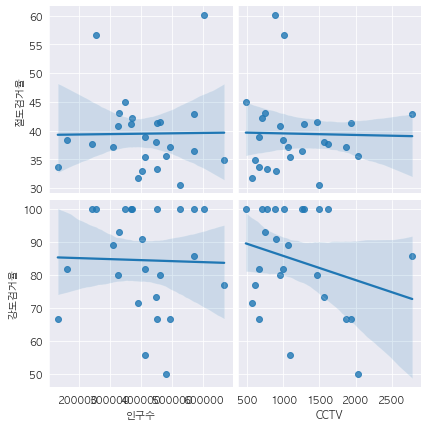

In [30]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], y_vars=["절도검거율", "강도검거율"], kind='reg', height=3)
plt.show()

In [31]:
# 검거율 합계인 검거 항목의 최댓값을 100으로 환산
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


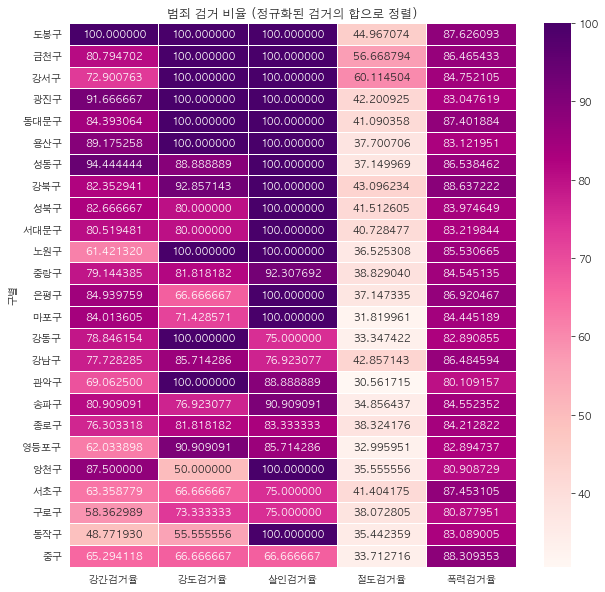

In [32]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

이를 통홰 확인할 수 있는 것은
1. 절도 검거율이 다른 검거율에 비해 낮음
1. 전반적으로 도봉구의 검거율이 우수함을 확인할 수 있음

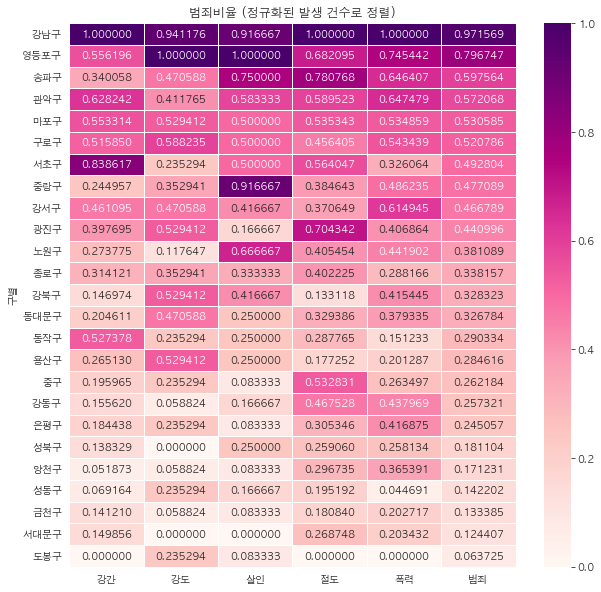

In [33]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

발생건수를 통해
강남구의 범죄 발생 건수가 많음을 확인할 수 있음

In [34]:
crime_anal_norm.to_csv('../data/02. crime_in_Seoul_2021_final.csv', sep=',', encoding='utf-8')

# 서울시 범죄율에 대한 지도 시각화

In [35]:
import folium
import json
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [36]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

/Users/jeonghyeonkoh/miniforge3/envs/data_study/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [37]:

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

/Users/jeonghyeonkoh/miniforge3/envs/data_study/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [38]:
tmp_criminal = crime_anal_norm['범죄'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

/Users/jeonghyeonkoh/miniforge3/envs/data_study/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [39]:
crime_anal_station = pd.read_csv('../data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8', index_col=0)
crime_anal_station.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도
0,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580
1,서울종로경찰서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747
2,서울남대문경찰서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498
3,서울서대문경찰서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770
4,서울혜화경찰서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914


In [40]:
col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_station[col] / crime_anal_station[col].max()
    
crime_anal_station['검거'] = np.sum(tmp, axis=1)

crime_anal_station.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도,검거
0,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,서울종로경찰서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,서울남대문경찰서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서울서대문경찰서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770,1.978299
4,서울혜화경찰서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [41]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_station.index:
    folium.Marker([crime_anal_station['위도'][n], 
                   crime_anal_station['경도'][n]]).add_to(map)
    
map

In [42]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_station.index:
    folium.CircleMarker([crime_anal_station['위도'][n], crime_anal_station['경도'][n]], 
                        radius = crime_anal_station['검거'][n]*12, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [43]:
tmp_criminal = crime_anal_norm['범죄'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd',
               key_on = 'feature.id')
               
for n in crime_anal_station.index:
    folium.CircleMarker([crime_anal_station['위도'][n], crime_anal_station['경도'][n]], 
                        radius = crime_anal_station['검거'][n]*12, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

/Users/jeonghyeonkoh/miniforge3/envs/data_study/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
